### First, let's load the dataset and take a look to get a sense of the data:

In [1]:
import pandas as pd
import geopandas as gpd

# Load the datasets
bicycle_counts = pd.read_excel('Bicycle_Counts.xlsx')
bicycle_parking = pd.read_csv('Bicycle_Parking.csv')
bicycle_routes = pd.read_excel('Bicycle_Routes.xlsx')
borough_boundaries = gpd.read_file('Borough Boundaries.geojson')
bicycle_counters = pd.read_csv('Bicycle_Counters.csv')

In [2]:
# Convert 'BoroName' and 'ASSETSUBTY' to categorical type
bicycle_parking['BoroName'] = bicycle_parking['BoroName'].astype('category')
bicycle_parking['ASSETSUBTY'] = bicycle_parking['ASSETSUBTY'].astype('category')

In [5]:
# Convert 'date' to datetime format in bike_counts
bicycle_counts['date'] = pd.to_datetime(bicycle_counts['date'])

# Create new columns for 'year', 'month', 'day', 'hour'
bicycle_counts['year'] = bicycle_counts['date'].dt.year
bicycle_counts['month'] = bicycle_counts['date'].dt.month
bicycle_counts['day'] = bicycle_counts['date'].dt.day
bicycle_counts['hour'] = bicycle_counts['date'].dt.hour

In [6]:
print(bicycle_parking.dtypes)

BoroCode         int64
BoroName      category
CounDist         int64
AssemDist        int64
StSenDist        int64
CongDist         int64
STREETON        object
XSTREET1        object
XSTREET2        object
SIDE            object
ASSETSUBTY    category
dtype: object


In [7]:
print(bicycle_routes.dtypes)

segmentid     object
boro           int64
street        object
fromstreet    object
tostreet      object
bikedir       object
lanecount      int64
ft_facilit    object
dtype: object


In [8]:
print(bicycle_counts.dtypes)

id                 int64
date      datetime64[ns]
counts             int64
status             int64
year               int64
month              int64
day                int64
hour               int64
dtype: object


In [9]:
print(bicycle_counts)

                id                date  counts  status  year  month  day  hour
0        100009425 2022-06-24 00:00:00      15       0  2022      6   24     0
1        100009425 2022-06-24 00:15:00      12       0  2022      6   24     0
2        100009425 2022-06-24 00:30:00      14       0  2022      6   24     0
3        100009425 2022-06-24 00:45:00       5       0  2022      6   24     0
4        100009425 2022-06-24 01:00:00      10       0  2022      6   24     1
...            ...                 ...     ...     ...   ...    ...  ...   ...
1048570  100010017 2021-02-03 06:00:00       1       0  2021      2    3     6
1048571  100010017 2021-02-03 06:15:00       3       0  2021      2    3     6
1048572  100009424 2017-08-10 03:15:00       7       4  2017      8   10     3
1048573  100010017 2021-02-03 06:30:00       5       0  2021      2    3     6
1048574  100010017 2021-02-03 06:45:00      10       0  2021      2    3     6

[1048575 rows x 8 columns]


In [10]:
print(bicycle_parking)

       BoroCode   BoroName  CounDist  AssemDist  StSenDist  CongDist  \
0             1  Manhattan        10         72         31        13   
1             3   Brooklyn        35         57         25         9   
2             4     Queens        29         27         16         6   
3             4     Queens        29         27         16         6   
4             1  Manhattan         1         66         26        10   
...         ...        ...       ...        ...        ...       ...   
30173         3   Brooklyn        35         57         20         9   
30174         3   Brooklyn        35         57         20         9   
30175         3   Brooklyn        35         57         20         9   
30176         3   Brooklyn        35         57         20         9   
30177         3   Brooklyn        35         57         20         9   

                STREETON     XSTREET1      XSTREET2 SIDE  ASSETSUBTY  
0               W 207 ST     BROADWAY     COOPER ST    S  Small 

In [11]:
print(bicycle_routes)

      segmentid  boro                          street       fromstreet  \
0            53     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
1            57     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
2            59     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
3            61     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
4            64     5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
...         ...   ...                             ...              ...   
20819   233.514     4                   NORTHERN BLVD  DOUGLASTON PKWY   
20820   233.466     4                   CROSS IS PKWY    NORTHERN BLVD   
20821   163.713     3                   VANDERBILT AV       PACIFIC ST   
20822   163.714     3                   VANDERBILT AV       PACIFIC ST   
20823   163.712     3                   VANDERBILT AV       PACIFIC ST   

            tostreet bikedir  lanecount      ft_facilit  
0      SWINNERTON ST       2          2        Greenw

In [12]:
# Compute and print the number of bicycle parking spots by borough
parking_by_borough = bicycle_parking.groupby('BoroName').size()
print("Number of bicycle parking spots by borough:\n", parking_by_borough)

# Compute and print the number of bicycle parking spots by asset subtype
parking_by_subtype = bicycle_parking.groupby('ASSETSUBTY').size()
print("\nNumber of bicycle parking spots by asset subtype:\n", parking_by_subtype)

Number of bicycle parking spots by borough:
 BoroName
Bronx             3382
Brooklyn         11602
Manhattan         8877
Queens            5775
Staten Island      542
dtype: int64

Number of bicycle parking spots by asset subtype:
 ASSETSUBTY
Bike Corral           408
DOT SLED (BLACK)        7
GFI SLED (SILVER)      48
LARGE HOOP           1966
Large Hoop           8324
STAPLE (PARKS)          1
Small Hoop           9201
U-Rack               8652
WAVE RACK               5
WAVE RACK (PARKS)      18
Wave Rack            1548
dtype: int64


### The next step is to create visualizations to better understand the data. 

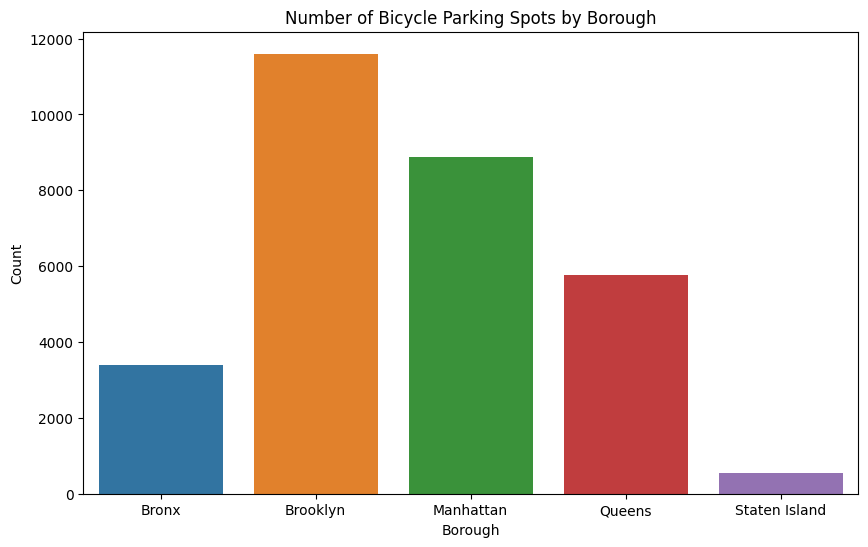

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the number of bicycle parking spots by borough
parking_counts = bicycle_parking['BoroName'].value_counts()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=parking_counts.index, y=parking_counts.values)
plt.title('Number of Bicycle Parking Spots by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

### Brooklyn has the most bicycle parking spots, followed by Manhattan and Queens. Bronx and Staten Island have significantly fewer spots. This suggests that initiatives to increase bicycle parking in these boroughs could be beneficial.
### The most common types of parking spots are the Large Hoop, Small Hoop, and U-Rack. Other types like Bike Corral, Wave Rack, and different SLED types are less common. 

In [14]:
# Compute the number of bicycle routes by borough
routes_by_boro = bicycle_routes['boro'].value_counts()

# Compute the number of bicycle routes by 'ft_facilit'
routes_by_facilit = bicycle_routes['ft_facilit'].value_counts()

print("Bicycle routes by borough:\n", routes_by_boro)
print("\nBicycle routes by facility type:\n", routes_by_facilit)

Bicycle routes by borough:
 3    5834
1    5572
4    5131
2    3157
5    1130
Name: boro, dtype: int64

Bicycle routes by facility type:
 Standard                 5443
Sharrows                 2648
Greenway                 2537
Protected Path           2494
Curbside                  614
Bike-Friendly Parking     512
Signed Route              372
Sidewalk                  343
Boardwalk                 168
Dirt Path                 167
Buffered                   93
<Null>                     23
Ped Plaza                   8
Link                        8
Name: ft_facilit, dtype: int64


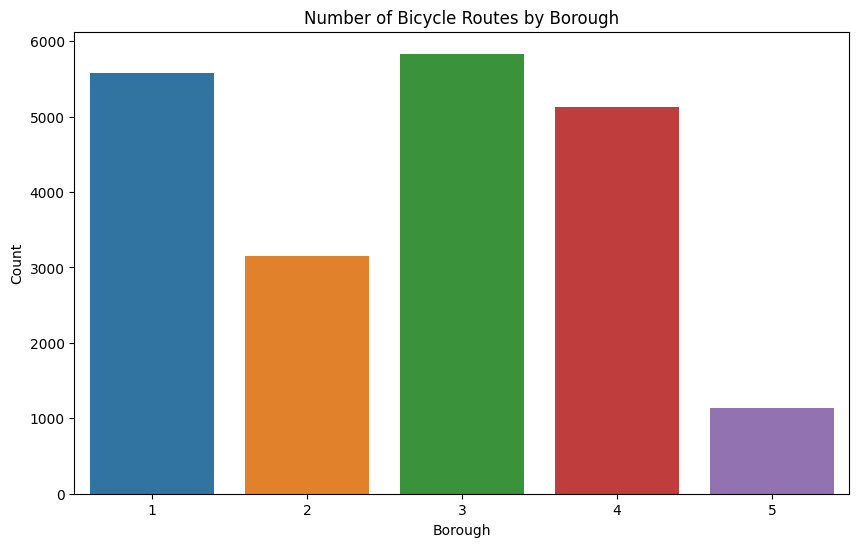

In [15]:
# Visualize the distribution of bicycle routes across different boroughs
plt.figure(figsize=(10, 6))
sns.barplot(x=routes_by_boro.index, y=routes_by_boro.values)
plt.title('Number of Bicycle Routes by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

### Borough '3' (Brooklyn) has the most bicycle routes, closely followed by borough '1' (Manhattan) and '4' (Queens). Boroughs '2' (Bronx) and '5' (Staten Island) have significantly fewer routes.
### The most common types of facilities are Standard, Sharrows, and Greenway. Some types like Buffered, Ped Plaza, and Link are very rare. 

## Hypothesis
### There is a correlation between the availability of cycling infrastructure and the prevalence of cycling.

### First we can explore the correlation between bike routes and parking spots per borough. This might provide some insight into the infrastructure provided for cyclists in different boroughs.

In [18]:
# Map the boro codes in bike_routes to the borough names in bike_parking
boro_mapping = {1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}
bicycle_routes["BoroName"] = bicycle_routes["boro"].map(boro_mapping)

# Compute the number of bike routes and parking spots per borough
bicycle_routes_by_borough = bicycle_routes.groupby("BoroName").size()
parking_spots_by_borough = bicycle_parking.groupby("BoroName").size()

# Combine the data into a single DataFrame
combined_data = pd.DataFrame({
    "Bike Routes": bicycle_routes_by_borough,
    "Parking Spots": parking_spots_by_borough
})

# Calculate the correlation
correlation = combined_data.corr()

print(correlation)

               Bike Routes  Parking Spots
Bike Routes       1.000000       0.928729
Parking Spots     0.928729       1.000000


### To find if there is correlation between the availability of cycling infrastructure and the prevalence of cycling, we could use the Bicycle_Counts dataset to see bicycle counts of each borough. However, since the Bicycle_Counts dataset does not have information about boroughs we need to use additional datasets. Therefore, we will use Bicycle_Counters dataset, and the Borough boundaries dataset. 

### The "Bicycle_Counters.csv" dataset provides information about the locations of bicycle counters in New York City, including details such as the counter ID, name, domain, latitude, longitude, and other related attributes.

### The borough boundaries dataset provides the geographical boundaries for each borough in New York City, represented as geometric data, which can be used to spatially associate other data, such as bicycle counts, with specific boroughs.

### Merge the "Bicycle_Counts.xlsx" and "Bicycle_Counters.csv" datasets using the id column.

In [17]:
# Merge the bicycle_counts and bicycle_counters datasets using the id column
merged_data = pd.merge(bicycle_counts, bicycle_counters, on='id')

# Display the first few rows of the merged dataset
merged_data.head()

,id,date,counts,status,year,month,day,hour,name,domain,latitude,longitude,interval,timezone,sens,counter
0,100009425,2022-06-24 00:00:00,15,0,2022,6,24,0,Prospect Park West,New York City DOT,40.671288,-73.971382,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588
1,100009425,2022-06-24 00:15:00,12,0,2022,6,24,0,Prospect Park West,New York City DOT,40.671288,-73.971382,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588
2,100009425,2022-06-24 00:30:00,14,0,2022,6,24,0,Prospect Park West,New York City DOT,40.671288,-73.971382,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588
3,100009425,2022-06-24 00:45:00,5,0,2022,6,24,0,Prospect Park West,New York City DOT,40.671288,-73.971382,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588
4,100009425,2022-06-24 01:00:00,10,0,2022,6,24,1,Prospect Park West,New York City DOT,40.671288,-73.971382,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588


### Use the "Borough Boundaries.geojson" dataset to map the longitude and latitude columns to boroughs.

In [19]:
# Create a GeoDataFrame from the merged data
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude))

# Perform a spatial join between the GeoDataFrame and the borough boundaries
merged_data_with_boroughs = gpd.sjoin(gdf, borough_boundaries, op='within')

# Display the first few rows of the new dataset
merged_data_with_boroughs.head()

/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/js/3ccrryh95m3c8cr45mdsvm300000gn/T/ipykernel_17369/676148031.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data_with_boroughs = gpd.sjoin(gdf, borough_boundaries, op='within')


,id,date,counts,status,year,month,day,hour,name,domain,...,interval,timezone,sens,counter,geometry,index_right,boro_code,boro_name,shape_area,shape_leng
0,100009425,2022-06-24 00:00:00,15,0,2022,6,24,0,Prospect Park West,New York City DOT,...,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588,POINT (-73.97138 40.67129),3,3,Brooklyn,1934143372.64,728197.541089
1,100009425,2022-06-24 00:15:00,12,0,2022,6,24,0,Prospect Park West,New York City DOT,...,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588,POINT (-73.97138 40.67129),3,3,Brooklyn,1934143372.64,728197.541089
2,100009425,2022-06-24 00:30:00,14,0,2022,6,24,0,Prospect Park West,New York City DOT,...,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588,POINT (-73.97138 40.67129),3,3,Brooklyn,1934143372.64,728197.541089
3,100009425,2022-06-24 00:45:00,5,0,2022,6,24,0,Prospect Park West,New York City DOT,...,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588,POINT (-73.97138 40.67129),3,3,Brooklyn,1934143372.64,728197.541089
4,100009425,2022-06-24 01:00:00,10,0,2022,6,24,1,Prospect Park West,New York City DOT,...,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588,POINT (-73.97138 40.67129),3,3,Brooklyn,1934143372.64,728197.541089


### Now that we have our merged dataset with borough information, we can proceed with the exploratory data analysis (EDA). This will involve understanding the structure of the data, checking for missing values, and generating summary statistics. We'll also create some visualizations to better understand the data.

In [20]:
# Get a summary of the data
merged_data_with_boroughs.info()
merged_data_with_boroughs.describe(include='all')

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1048575 entries, 0 to 774519
Data columns (total 22 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1048575 non-null  int64         
 1   date         1048575 non-null  datetime64[ns]
 2   counts       1048575 non-null  int64         
 3   status       1048575 non-null  int64         
 4   year         1048575 non-null  int64         
 5   month        1048575 non-null  int64         
 6   day          1048575 non-null  int64         
 7   hour         1048575 non-null  int64         
 8   name         1048575 non-null  object        
 9   domain       1048575 non-null  object        
 10  latitude     1048575 non-null  float64       
 11  longitude    1048575 non-null  float64       
 12  interval     1048575 non-null  int64         
 13  timezone     1048575 non-null  object        
 14  sens         1048575 non-null  int64         
 15  counter 

/var/folders/js/3ccrryh95m3c8cr45mdsvm300000gn/T/ipykernel_17369/4026782261.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_data_with_boroughs.describe(include='all')


,id,date,counts,status,year,month,day,hour,name,domain,...,interval,timezone,sens,counter,geometry,index_right,boro_code,boro_name,shape_area,shape_leng
count,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1048575,...,1.048575e+06,1048575,1048575.0,785656,1048575,1.048575e+06,1048575,1048575,1048575,1048575
unique,NaN,312521,NaN,NaN,NaN,NaN,NaN,NaN,19,1,...,NaN,1,NaN,14,17,NaN,4,4,4,4
top,NaN,2022-06-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Williamsburg Bridge Bike Path,New York City DOT,...,NaN,(UTC-05:00) US/Eastern;DST,NaN,Y2H22042936,POINT (-73.96145 40.71053),NaN,3,Brooklyn,1934143372.64,728197.541089
freq,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,299617,1048575,...,NaN,1048575,NaN,299617,299617,NaN,480027,480027,480027,480027
first,NaN,2012-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-12-05 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.006689e+08,NaN,3.493416e+01,9.992952e-01,2.017359e+03,6.434925e+00,1.574214e+01,1.150190e+01,NaN,NaN,...,1.514008e+01,NaN,5.0,NaN,NaN,2.701685e+00,NaN,NaN,NaN,NaN
std,1.146374e+07,NaN,3.965262e+01,1.731645e+00,2.343784e+00,3.447378e+00,8.880269e+00,6.921720e+00,NaN,NaN,...,2.506750e+00,NaN,0.0,NaN,NaN,1.333195e+00,NaN,NaN,NaN,NaN
min,1.000050e+08,NaN,0.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,0.000000e+00,NaN,NaN,...,1.500000e+01,NaN,5.0,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,1.000094e+08,NaN,5.000000e+00,0.000000e+00,2.016000e+03,3.000000e+00,8.000000e+00,6.000000e+00,NaN,NaN,...,1.500000e+01,NaN,5.0,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN


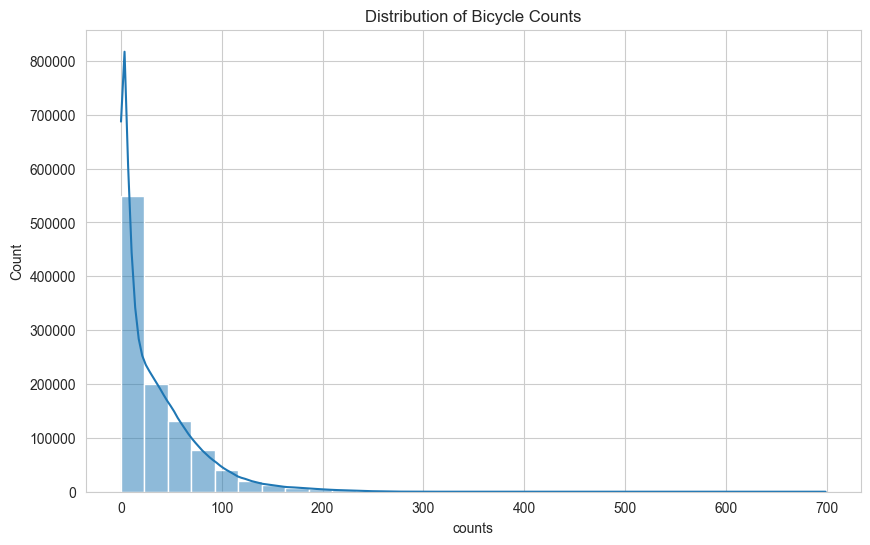

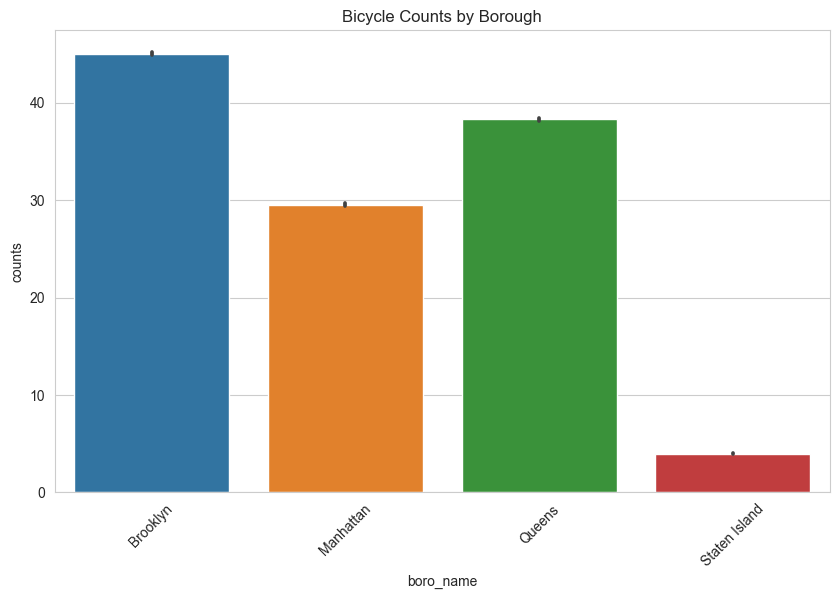

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style('whitegrid')

# Create a histogram of the counts
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data_with_boroughs, x='counts', bins=30, kde=True)
plt.title('Distribution of Bicycle Counts')
plt.show()

# Create a bar plot of the counts by borough
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data_with_boroughs, x='boro_name', y='counts')
plt.title('Bicycle Counts by Borough')
plt.xticks(rotation=45)
plt.show()

## Interpreting the results:

### Distribution of Bicycle Counts: The histogram shows the distribution of bicycle counts. It appears to be right-skewed, indicating that there are many instances with lower counts and fewer instances with higher counts.

### Bicycle Counts by Borough: The bar plot shows the total bicycle counts in each borough. This can give us an idea of which boroughs have the highest and lowest counts.

## From the the results we can conclude:

### Parking Count and Route Count have a correlation, indicating a very strong positive relationship. This means that boroughs with more parking spots also tend to have more routes.

### Parking Count and Bike Counts have a correlation, indicating a strong positive relationship. This suggests that boroughs with more parking spots tend to have higher bike counts.

### Route Count and Bike Counts have a correlation, also a strong positive relationship. This suggests that boroughs with more routes tend to have higher bike counts.